In [24]:
#Importing packages

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import image
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os
from shutil import move

(885, 1268)

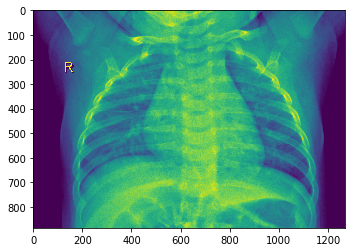

In [49]:
#Load a test image and see everything loaded

location = "chest_xray/train/NORMAL"


test_pic = plt.imread(location + "/IM-0311-0001.jpeg")
plt.imshow(test_pic)
test_pic.shape
#As this is black and white image, it only has one dimension.

In [33]:
#Splitting the pneumonia into viral and bacteria foldersfolders
train_location="chest_xray/train"
test_location="chest_xray/test"

orig_train_pneumonia="chest_xray/train/PNEUMONIA"
orig_test_pneumonia="chest_xray/test/PNEUMONIA"

In [42]:
#Definition to move viral and bacteria pneumonia images into differenct directory and remove the parent directory.
#Purpose is to be able to use ImageDataGenerator.flow_from_direcotry()
def reorganize_files(pneumonia_directory, parent_directory):
    bac_dir=parent_directory + "/Bacterial"
    vir_dir=parent_directory + "/Viral"
    
    os.mkdir(bac_dir)
    os.mkdir(vir_dir)
    
    for filename in os.listdir(pneumonia_directory):
        if (filename.lower().find("bacteria") == -1): #Did not contain bacteria in name, must be viral.
            move(pneumonia_directory+"/"+filename,vir_dir)
        else: #This is bacterial pneumonia.
            move(pneumonia_directory+"/"+filename,bac_dir)
                 
    os.rmdir(pneumonia_directory)
        

In [43]:
#Check if the folder were indeed been organized., if not, move it.

if(os.path.exists(orig_train_pneumonia)):
    reorganize_files(orig_train_pneumonia, train_location)
    
if(os.path.exists(orig_test_pneumonia)):
    reorganize_files(orig_test_pneumonia, test_location)


In [ ]:
#Load the dataset.

from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                )

test_datagen=ImageDataGenerator(rescale=1./255)